In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
        
crimes_df = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2012_to_2017.csv')
fbi_df = pd.read_csv('/kaggle/input/fbicode/FBICode.csv')
soc_df = pd.read_csv('/kaggle/input/socioeconomic/Socioeconomic.csv')
soc_df.columns = soc_df.columns.map(lambda x: x.capitalize().strip())

print('These dataset has {0} observations with {1} features'.format(crimes_df.shape[0], crimes_df.shape[1]))

These dataset has 1456714 observations with 23 features


In [2]:
# Drop first features in dataset
crimes_df = crimes_df.iloc[:, 1:]
print('These dataset has {0} observations with {1} features'.format(crimes_df.shape[0], crimes_df.shape[1]))

These dataset has 1456714 observations with 22 features


In [3]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1456714 non-null  int64  
 1   Case Number           1456713 non-null  object 
 2   Date                  1456714 non-null  object 
 3   Block                 1456714 non-null  object 
 4   IUCR                  1456714 non-null  object 
 5   Primary Type          1456714 non-null  object 
 6   Description           1456714 non-null  object 
 7   Location Description  1455056 non-null  object 
 8   Arrest                1456714 non-null  bool   
 9   Domestic              1456714 non-null  bool   
 10  Beat                  1456714 non-null  int64  
 11  District              1456713 non-null  float64
 12  Ward                  1456700 non-null  float64
 13  Community Area        1456674 non-null  float64
 14  FBI Code              1456714 non-

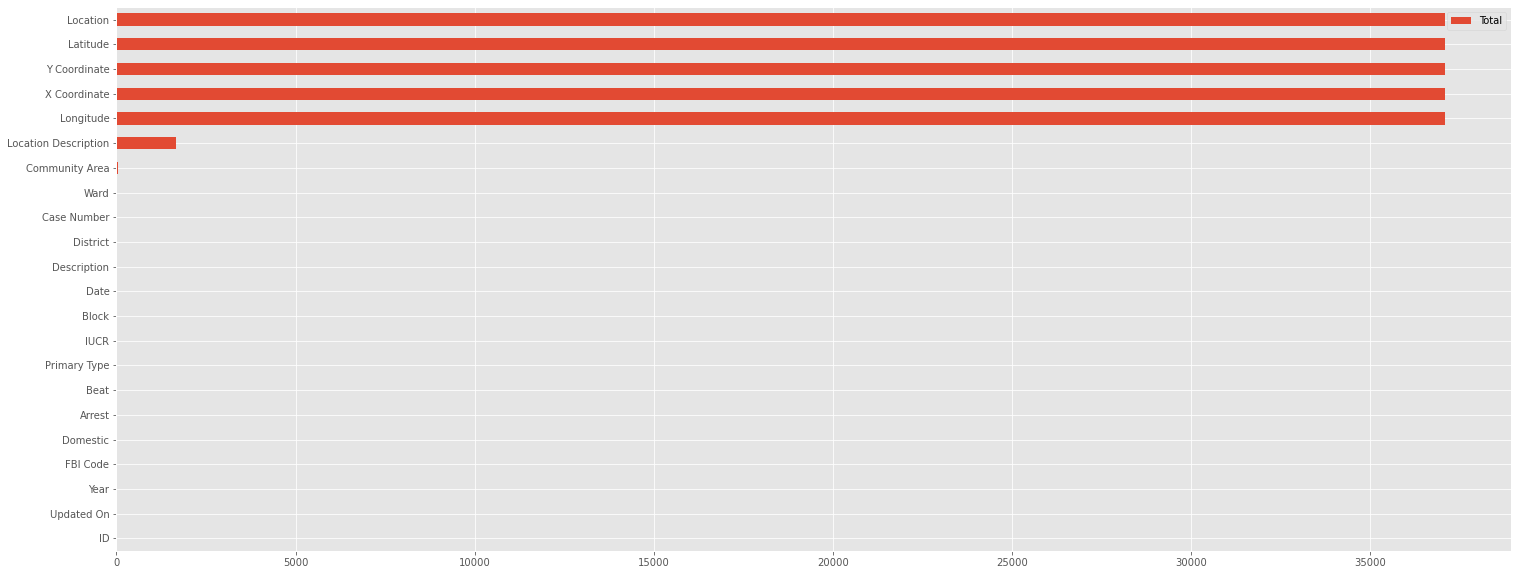

In [10]:
missing_df = pd.DataFrame(list(crimes_df.isna().sum()), index=crimes_df.columns, columns=['Total'])
missing_df.sort_values(by='Total').plot.barh(figsize=(25, 10))

In [12]:
missing_df['Remain'] = crimes_df.shape[0] - missing_df['Total']
missing_df.columns=['Missing', 'Remain']
missing_df

,Missing,Remain
ID,0,1456714
Case Number,1,1456713
Date,0,1456714
Block,0,1456714
IUCR,0,1456714
Primary Type,0,1456714
Description,0,1456714
Location Description,1658,1455056
Arrest,0,1456714
Domestic,0,1456714


In [14]:
missing_df.to_csv('misisng.csv')

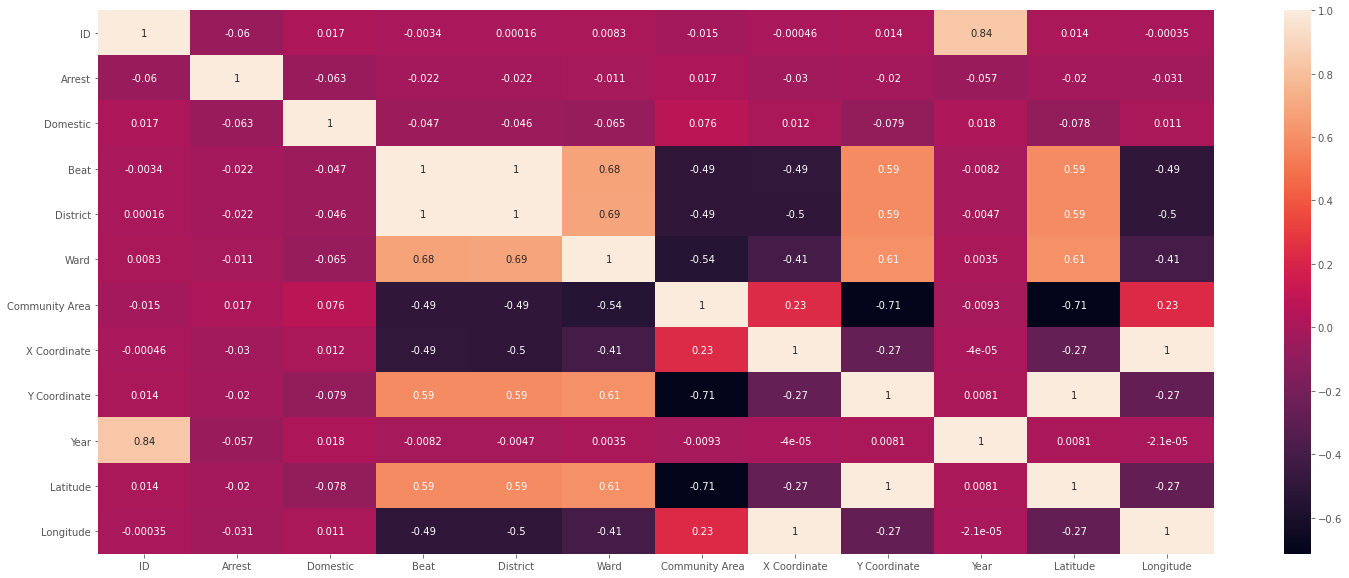

In [15]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(crimes_df.corr(), annot=True)

In [16]:
month_df = pd.to_datetime(crimes_df['Date']).dt.month
crimes_df['Month'] = month_df.map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
})

fbi_df.index = fbi_df['Code']
fbi_df = fbi_df.iloc[:, 1:]

for col in fbi_df.columns:
    fbi_df[col] = fbi_df[col].map(lambda item: item.strip())
    
crimes_df['FBI Code Name'] = crimes_df['FBI Code'].map(lambda x: fbi_df.loc[x, 'Name'])
crimes_df['FBI Code Type'] = crimes_df['FBI Code'].map(lambda x: fbi_df.loc[x, 'Type'])

crimes_df = pd.DataFrame.merge(crimes_df, soc_df, how='left', left_on = ['Community Area'], right_on=['Community area number'])

In [17]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456714 entries, 0 to 1456713
Data columns (total 34 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   ID                                            1456714 non-null  int64  
 1   Case Number                                   1456713 non-null  object 
 2   Date                                          1456714 non-null  object 
 3   Block                                         1456714 non-null  object 
 4   IUCR                                          1456714 non-null  object 
 5   Primary Type                                  1456714 non-null  object 
 6   Description                                   1456714 non-null  object 
 7   Location Description                          1455056 non-null  object 
 8   Arrest                                        1456714 non-null  bool   
 9   Domestic                           

In [20]:
crimes_df.drop(['Community area number'], axis=1)
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456714 entries, 0 to 1456713
Data columns (total 34 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   ID                                            1456714 non-null  int64  
 1   Case Number                                   1456713 non-null  object 
 2   Date                                          1456714 non-null  object 
 3   Block                                         1456714 non-null  object 
 4   IUCR                                          1456714 non-null  object 
 5   Primary Type                                  1456714 non-null  object 
 6   Description                                   1456714 non-null  object 
 7   Location Description                          1455056 non-null  object 
 8   Arrest                                        1456714 non-null  bool   
 9   Domestic                           

In [21]:
crimes_df.to_csv('transformed_crimes.csv', index=False)

In [26]:
{
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}.values()

dict_values(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

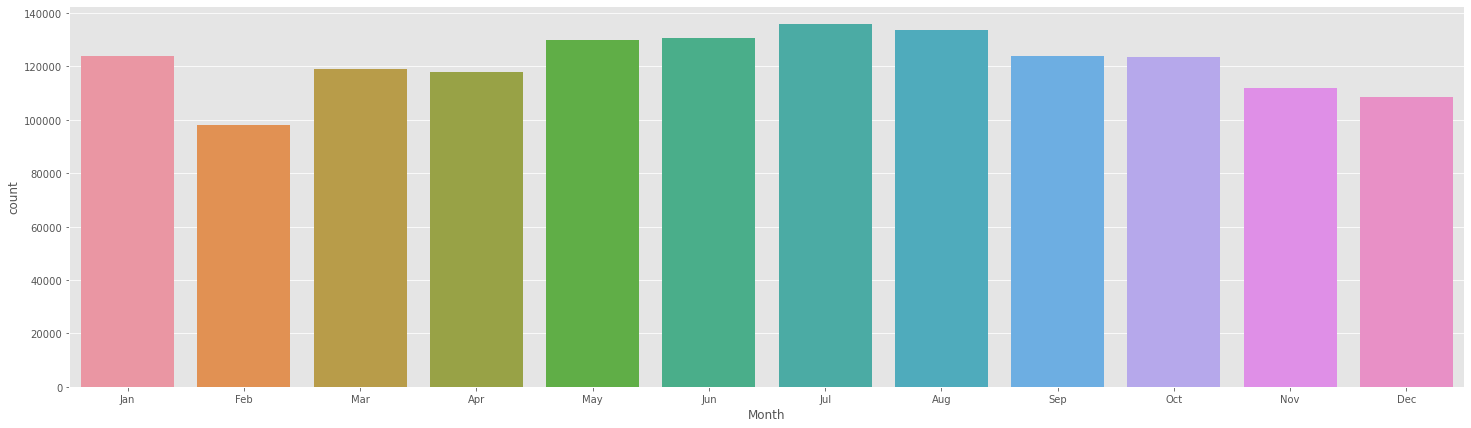

In [34]:
from pandas.api.types import CategoricalDtype
cats_to_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
covered_type = CategoricalDtype(categories=cats_to_order, ordered=True)

fig, ax = plt.subplots(figsize=(25, 7))
month_plot = sns.countplot(crimes_df.Month.astype('category').cat.reorder_categories(cats_to_order, ordered=True))
month_plot.get_figure().savefig('month.png')

In [38]:
list(crimes_df.Month.astype('category').cat.reorder_categories(cats_to_order, ordered=True).value_counts(sort=False))

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category')